# Week 2  - Peer-graded Assignment; Capstone Project - Car Accident Severity

This project is aimed at helping car users predict ahead of a travel the probability of an accident happening on a route they desire to take and the severity of the accident. This model can help suggest safer roads to the user in case of emergencies or matters of urgency by predicting the occurrence of an accident on roads based on the weather of the day and conditions of the road.

### First, I'm gonna import useful libraries

In [1]:
# import time module to calculate total time used for the whole process 
import time
start = time.time()

# basic data manipulation libraries
import pandas as pd
import numpy as np

# modules for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline

# encoders for categorical data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# model modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss # additional metric for Logistic Regression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# metric evaluation modules
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Here, I'm gonna set some options

In [2]:
# the code below displays all rows
pd.options.display.max_columns = 50

### Next, I'm gonna import the dataset

In [3]:
df = pd.read_csv('Data-Collisions.csv')
df2 = df.copy()
print(df.shape)
df.head(2)

C:\Users\Xtretchy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


### Lets get basic description about our data

In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


### Here, I'm gonna trim the dataset for model use

In [5]:
df = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYDESC']]
df.head()

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYDESC
0,Overcast,Wet,Daylight,Injury Collision
1,Raining,Wet,Dark - Street Lights On,Property Damage Only Collision
2,Overcast,Dry,Daylight,Property Damage Only Collision
3,Clear,Dry,Daylight,Property Damage Only Collision
4,Raining,Wet,Daylight,Injury Collision


### Here, I'm dropping all rows which include nan values

In [6]:
print('Shape before dropping nan values:', df.shape)
df.dropna(inplace = True)
print('Shape after dropping nan values:', df.shape)

Shape before dropping nan values: (194673, 4)
Shape after dropping nan values: (189337, 4)


### Lets make some basic plots

In [7]:
df_wr = df['WEATHER'].value_counts()
df_rc = df['ROADCOND'].value_counts()
df_lc = df['LIGHTCOND'].value_counts()

Text(0.5, 1.0, 'Accidents Occurrence by Weather')

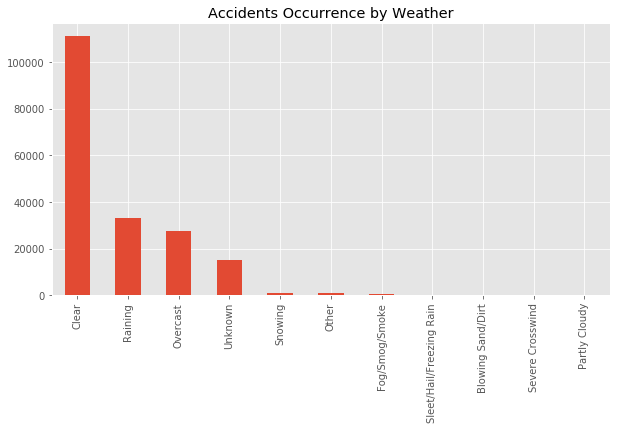

In [8]:
plt.figure()
df_wr.plot(kind = 'bar', figsize = (10,5))
plt.title('Accidents Occurrence by Weather')

Text(0.5, 1.0, 'Accidents Occurrence by Road Conditions')

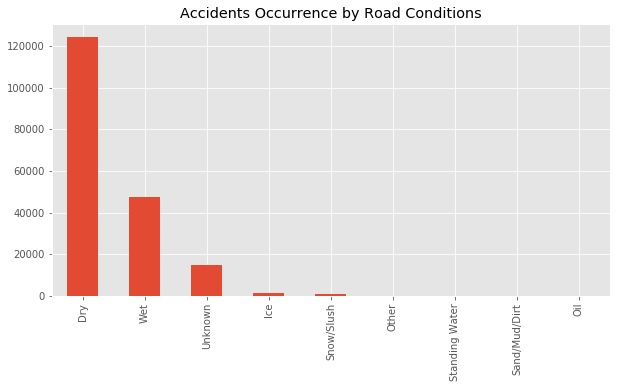

In [9]:
plt.figure()
df_rc.plot(kind = 'bar', figsize = (10,5))
plt.title('Accidents Occurrence by Road Conditions')

Text(0.5, 1.0, 'Accidents Occurrence by Light Conditions')

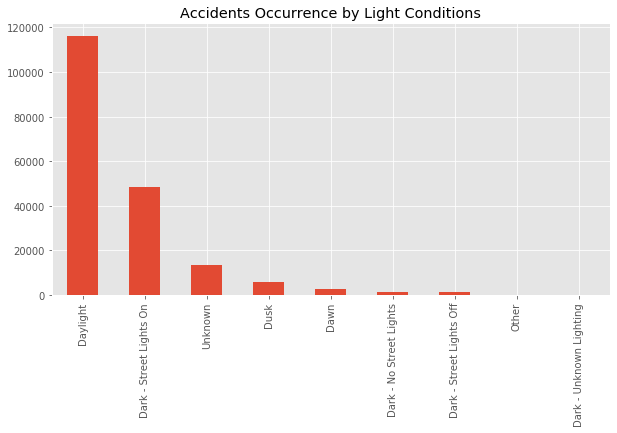

In [10]:
plt.figure()
df_lc.plot(kind = 'bar', figsize = (10,5))
plt.title('Accidents Occurrence by Light Conditions')

From the above plots, we can infer immediately that most of the accidents occured when the <u>weather was clear</u>, when the <u>road was dry</u> and then <u>during daylight</u>. Left to me, these conditions are really odd because I expect traffic to be at the smoothest when these conditions hold.

### Here, I'll set my predictor variables as x and target variable as y

In [11]:
x = df[['WEATHER', 'ROADCOND', 'LIGHTCOND']]
y = df[['SEVERITYDESC']]

# For this project, I'll be using four models of which I'm to select the most appropriate from them all. They include:

* Logistic Regression
* Support Vector Machine
* Decision Tree
* K Nearest Neighbour

### Logistic Regression

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

oe = OrdinalEncoder().fit(x)
le = LabelEncoder().fit(y)

x_train_lr = oe.transform(x_train)
x_test_lr = oe.transform(x_test)

y_train_lr = le.transform(y_train)
y_test_lr = le.transform(y_test)

C:\Users\Xtretchy\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Xtretchy\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
LR = LogisticRegression(C = 0.01, solver = 'lbfgs').fit(x_train_lr, y_train_lr)

y_hat_lr = LR.predict(x_test_lr)
y_prob_lr = LR.predict_proba(x_test_lr)

print(y_test_lr[:35])
print(y_hat_lr[:35])

[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
acc_lr = accuracy_score(y_test_lr, y_hat_lr)
f1_lr = f1_score(y_test_lr, y_hat_lr, average = 'weighted')
log_loss_lr = log_loss(y_test_lr, y_prob_lr)

print('Accuracy Score:', acc_lr)
print('F1-score:', f1_lr)
print('Log Loss:', log_loss_lr)

Accuracy Score: 0.6961550649625013
F1-score: 0.5714476046252985
Log Loss: 0.6059277759133757


### Support Vector Machine

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

oe = OrdinalEncoder().fit(x)
le = LabelEncoder().fit(y)

x_train_svm = oe.transform(x_train)
x_test_svm = oe.transform(x_test)

y_train_svm = le.transform(y_train)
y_test_svm = le.transform(y_test)

C:\Users\Xtretchy\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Xtretchy\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
SVM = svm.SVC(kernel = 'rbf').fit(x_train_svm, y_train_svm)

y_hat_svm = SVM.predict(x_test_svm)

print(y_test_svm[:35])
print(y_hat_svm[:35])

[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
acc_svm = accuracy_score(y_test_svm, y_hat_svm)
f1_svm = f1_score(y_test_svm, y_hat_svm, average = 'weighted')

print('Accuracy Score:', acc_svm)
print('F1-score:', f1_svm)

Accuracy Score: 0.6961550649625013
F1-score: 0.5714476046252985


### Decision Tree

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

oe = OrdinalEncoder().fit(x)
le = LabelEncoder().fit(y)

x_train_dt = oe.transform(x_train)
x_test_dt = oe.transform(x_test)

y_train_dt = le.transform(y_train)
y_test_dt = le.transform(y_test)

C:\Users\Xtretchy\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Xtretchy\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(x_train_dt, y_train_dt)

y_hat_dt = dt.predict(x_test_dt)

print(y_test_dt[:35])
print(y_hat_dt[:35])

[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
acc_dt = accuracy_score(y_test_dt, y_hat_dt)
f1_dt = f1_score(y_test_dt, y_hat_dt, average = 'weighted')

print('Accuracy Score:', acc_dt)
print('F1-score:', f1_dt)

Accuracy Score: 0.6961550649625013
F1-score: 0.5714476046252985


### K Nearest Neighbour

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

oe = OrdinalEncoder().fit(x)
le = LabelEncoder().fit(y)

x_train_knn = oe.transform(x_train)
x_test_knn = oe.transform(x_test)

y_train_knn = le.transform(y_train)
y_test_knn = le.transform(y_test)

C:\Users\Xtretchy\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Xtretchy\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train_knn, y_train_knn)
    y_hat_knn = knn.predict(x_test_knn)

    print('For k =', i)
    print(y_test_knn[:35])
    print(y_hat_knn[:35])

    acc_knn = accuracy_score(y_test_knn, y_hat_knn)
    f1_knn = f1_score(y_test_knn, y_hat_knn, average = 'weighted')

    print('Accuracy Score:', acc_knn)
    print('F1-score:', f1_knn)
    print()

For k = 1
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy Score: 0.6621949931340446
F1-score: 0.5796196143402484

For k = 2
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy Score: 0.6522657652899546
F1-score: 0.5818117238084592

For k = 3
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy Score: 0.6756100137319109
F1-score: 0.5892864834714028

For k = 4
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy Score: 0.6673708672229851
F1-score: 0.5898932768240222

For k = 5
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

From the above results, we can see that k = 4 hast the best f1-score.

So the final model we will use is the knn where number of nearest neighbours is equal to 4. And we will be training the model on all of the dataset to achieve a better accuracy.

### Our Final Model - k Nearest Neighbour, where k = 4.

In [23]:
oe = OrdinalEncoder()
le = LabelEncoder()

x_train_knn2 = oe.fit_transform(x)
y_train_knn2 = le.fit_transform(y)

knn2 = KNeighborsClassifier(n_neighbors = 4).fit(x_train_knn2, y_train_knn2)
y_hat_knn2 = knn2.predict(x_train_knn2)

print(y_train_knn2[:35])
print(y_hat_knn2[:35])

acc_knn2 = accuracy_score(y_train_knn2, y_hat_knn2)
f1_knn2 = f1_score(y_train_knn2, y_hat_knn2, average = 'weighted')

print('Accuracy Score:', acc_knn2)
print('F1-score:', f1_knn2)
print()

C:\Users\Xtretchy\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1]
Accuracy Score: 0.6334472395781068
F1-score: 0.5964735500461937



### Number of total matches

In [24]:
matches = 0

for i in range(len(y_train_knn2)):
    if y_train_knn2[i] == y_hat_knn2[i]:
        matches += 1
        
print('Total matches are {} of {}, approximately {}%.'
      .format(matches, len(y_train_knn2), round(matches/len(y_train_knn2) * 100))) 

Total matches are 119935 of 189337, approximately 63%.


### Now that our model is ready, let's make some random variables and use them to predict an outcome and also determine the probability of that outcome.

In [25]:
new = ['Clear', 'Dry', 'Daylight'] # random variable 1

new_2 = pd.DataFrame(np.array([new]))
new_2 = oe.transform(new_2)

y_new = knn2.predict(new_2)
y_new = le.inverse_transform(y_new)[0]
y_new_prob = knn2.predict_proba(new_2)[0].max()

print('For', str(new) + ':')
print('\nAccuracy Score:', acc_knn2)
print('F1-score:', f1_knn2)
print('There is a %.5g probability that there will be %s.' % (y_new_prob, y_new))

For ['Clear', 'Dry', 'Daylight']:

Accuracy Score: 0.6334472395781068
F1-score: 0.5964735500461937
There is a 0.75 probability that there will be Property Damage Only Collision.


In [26]:
new = ['Raining', 'Wet', 'Dusk'] # random variable 2

new_2 = pd.DataFrame(np.array([new]))
new_2 = oe.transform(new_2)

y_new = knn2.predict(new_2)
y_new = le.inverse_transform(y_new)[0]
y_new_prob = knn2.predict_proba(new_2)[0].max()

print('For', str(new) + ':')
print('\nAccuracy Score:', acc_knn2)
print('F1-score:', f1_knn2)
print('There is a %.5g probability that there will be %s.' % (y_new_prob, y_new))

For ['Raining', 'Wet', 'Dusk']:

Accuracy Score: 0.6334472395781068
F1-score: 0.5964735500461937
There is a 0.75 probability that there will be Injury Collision.


In [27]:
new = ['Overcast', 'Dry', 'Dark - Street Lights Off'] # random variable 3

new_2 = pd.DataFrame(np.array([new]))
new_2 = oe.transform(new_2)

y_new = knn2.predict(new_2)
y_new = le.inverse_transform(y_new)[0]
y_new_prob = knn2.predict_proba(new_2)[0].max()

print('For', str(new) + ':')
print('\nAccuracy Score:', acc_knn2)
print('F1-score:', f1_knn2)
print('There is a %.5g probability that there will be %s.' % (y_new_prob, y_new))

For ['Overcast', 'Dry', 'Dark - Street Lights Off']:

Accuracy Score: 0.6334472395781068
F1-score: 0.5964735500461937
There is a 0.75 probability that there will be Property Damage Only Collision.


In [28]:
end = time.time()
total_time = (end - start) / 60
print('The whole process took approximately %s minutes to complete.' % (round(total_time)))

The whole process took approximately 29 minutes to complete.


## Conclusion

The best machine learning model for the project was found to be the <b>k Nearest Neighbour</b> with total percentage match of 63%, accuracy of 0.63 and f1-score of 0.60. The whole process takes approximately 20 to 30 minutes to conclude. Thanks for reading!

# Here we go!

* We started by training different models on the dataset,
* then we were able to select the best model for the dataset on basis of highest accuracy and
* then we used this model to predict a new outcome and the probability of that outcome.


# <center> Thanks for reading! </center>